In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")

In [3]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  int64 
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  int64 
 7   loan        31647 non-null  int64 
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  int64 
 16  subscribed  31647 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 4.1+ MB


In [42]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns",categorical_col)
print('\n')

numerical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns",numerical_col)
print('\n')

Categorical columns ['job', 'marital', 'education', 'contact', 'month']


Numerical columns ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']




In [6]:
df.nunique().to_frame("No of unique Values in each column")

,No of unique Values in each column
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [7]:
df.drop('ID',axis = 1, inplace= True)

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df['pdays'].nunique()

509

In [11]:
df['pdays'].unique()

array([ -1,  84, 251,   9, 456, 120,  92, 347, 154, 291, 344, 196, 324,
       332, 304, 297, 149, 102, 330, 301, 182,  26, 112, 457, 104, 256,
        90,  94, 135, 113, 360, 224,  98, 153,  82,  18, 343, 337, 365,
        93, 174,  96, 193,  83,  87, 272, 261,  91, 156, 195, 181, 151,
       336, 323, 342,  99, 187, 141, 329, 253, 352, 172, 177, 771, 555,
       119, 190, 362, 189, 351, 254, 169, 357, 111, 317, 367, 160, 116,
       356,  77, 225, 206, 331, 100, 136, 346, 260, 484, 176,  95, 230,
       366, 319, 521, 152, 179, 215, 430, 287, 842, 349, 180, 259, 283,
       275, 348, 140, 202, 370,  89, 184, 213, 308, 255, 188,  86, 161,
       252, 129, 271, 334, 279, 358, 103,   6, 110, 316, 270, 363, 374,
       197, 106, 198, 322, 131, 338, 235, 146, 295,  35, 459, 274, 273,
         4, 105, 143, 326, 183, 229, 369, 241, 280, 318, 173, 132, 201,
       368, 266, 340,  97, 364, 167,   5, 288, 276, 335, 493,  50, 134,
       145,  21, 147, 312, 269, 148, 305, 265,   2, 792, 246, 37

In [12]:
df['previous'].unique()

array([  0,   3,   2,   4,   1,   5,   9,   6,   8,  11,  16,  10,  14,
         7,  12,  23,  13,  18,  30,  27, 275,  20,  15,  17,  19,  22,
        25,  26,  28,  29,  32,  21,  24,  38,  58,  35,  41,  37],
      dtype=int64)

In [13]:
df['campaign'].unique()

array([ 2,  1,  3,  4,  7,  5, 33, 12,  8,  9,  6, 24, 17, 11, 20, 25, 19,
       29, 21, 10, 27, 38, 16, 18, 14, 30, 13, 15, 63, 23, 31, 43, 35, 22,
       34, 28, 26, 41, 37, 50, 55, 32, 44, 36, 39], dtype=int64)

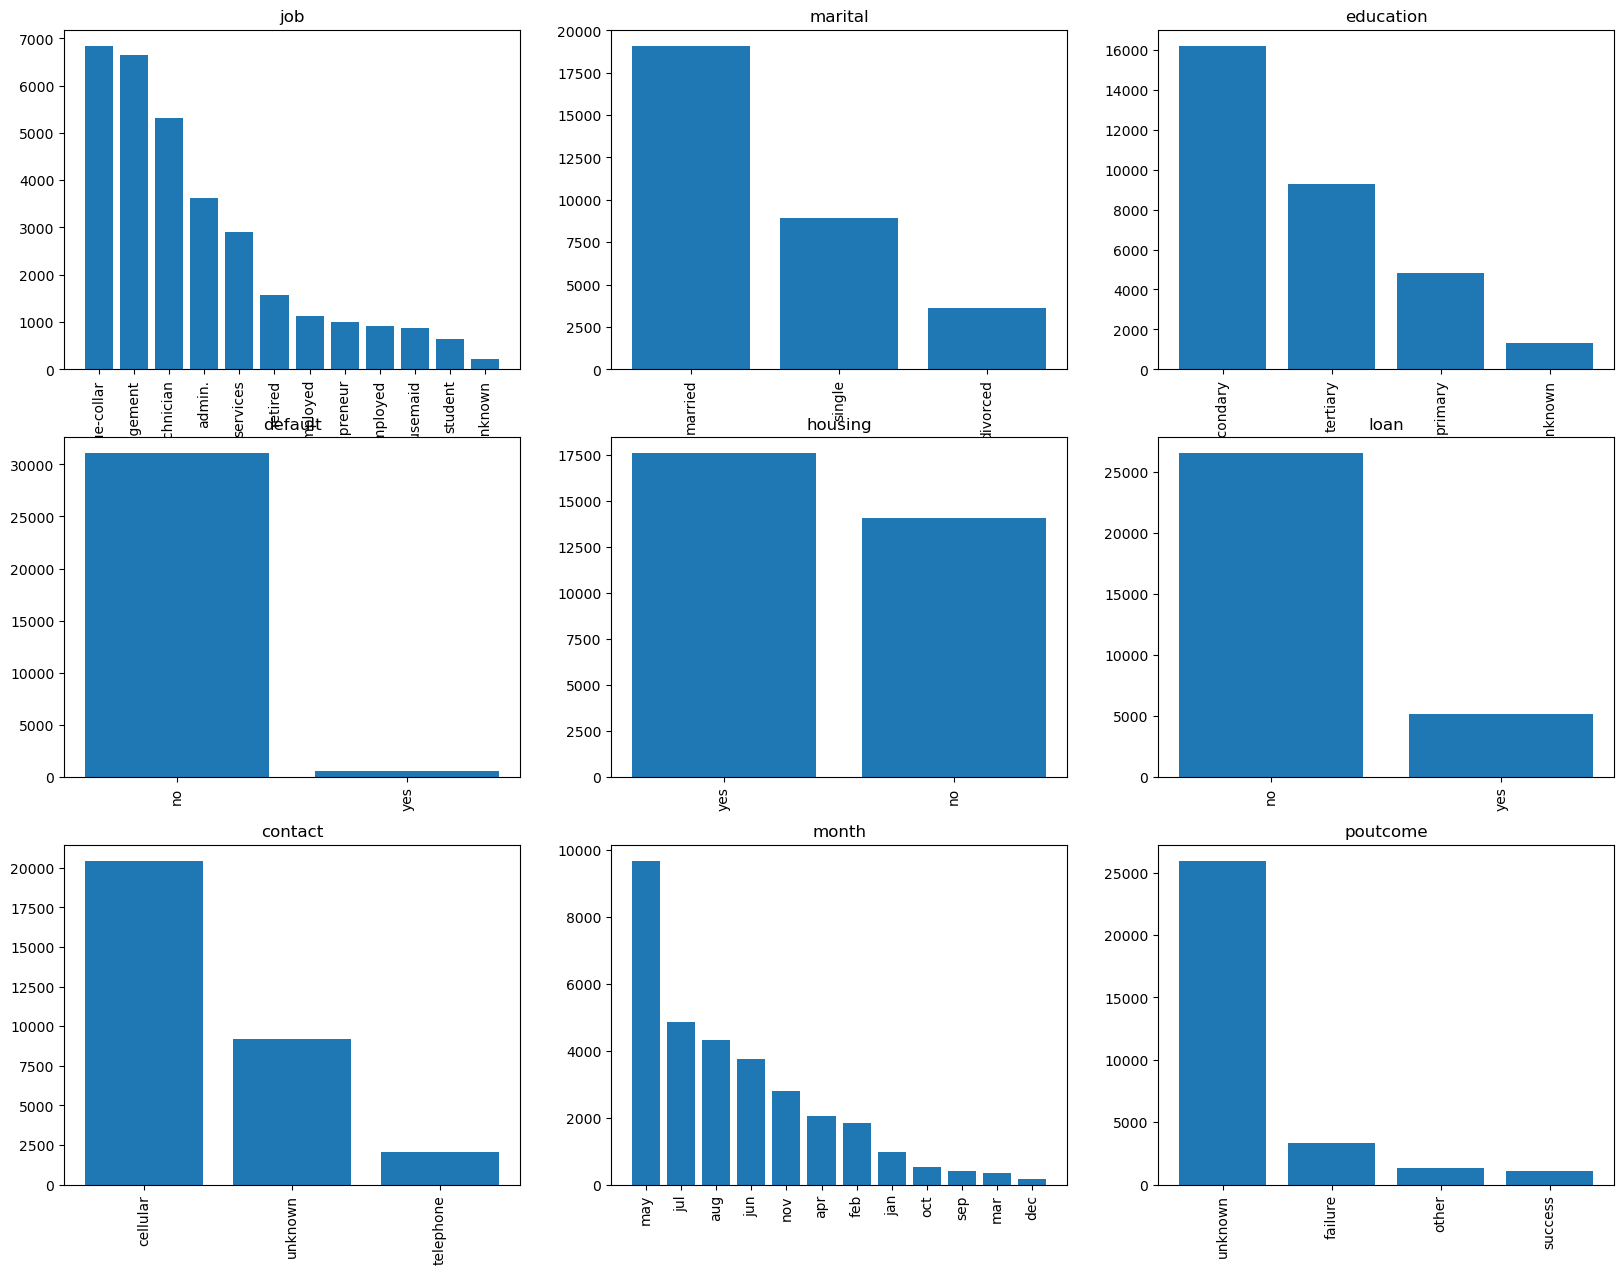

In [14]:
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical_col:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

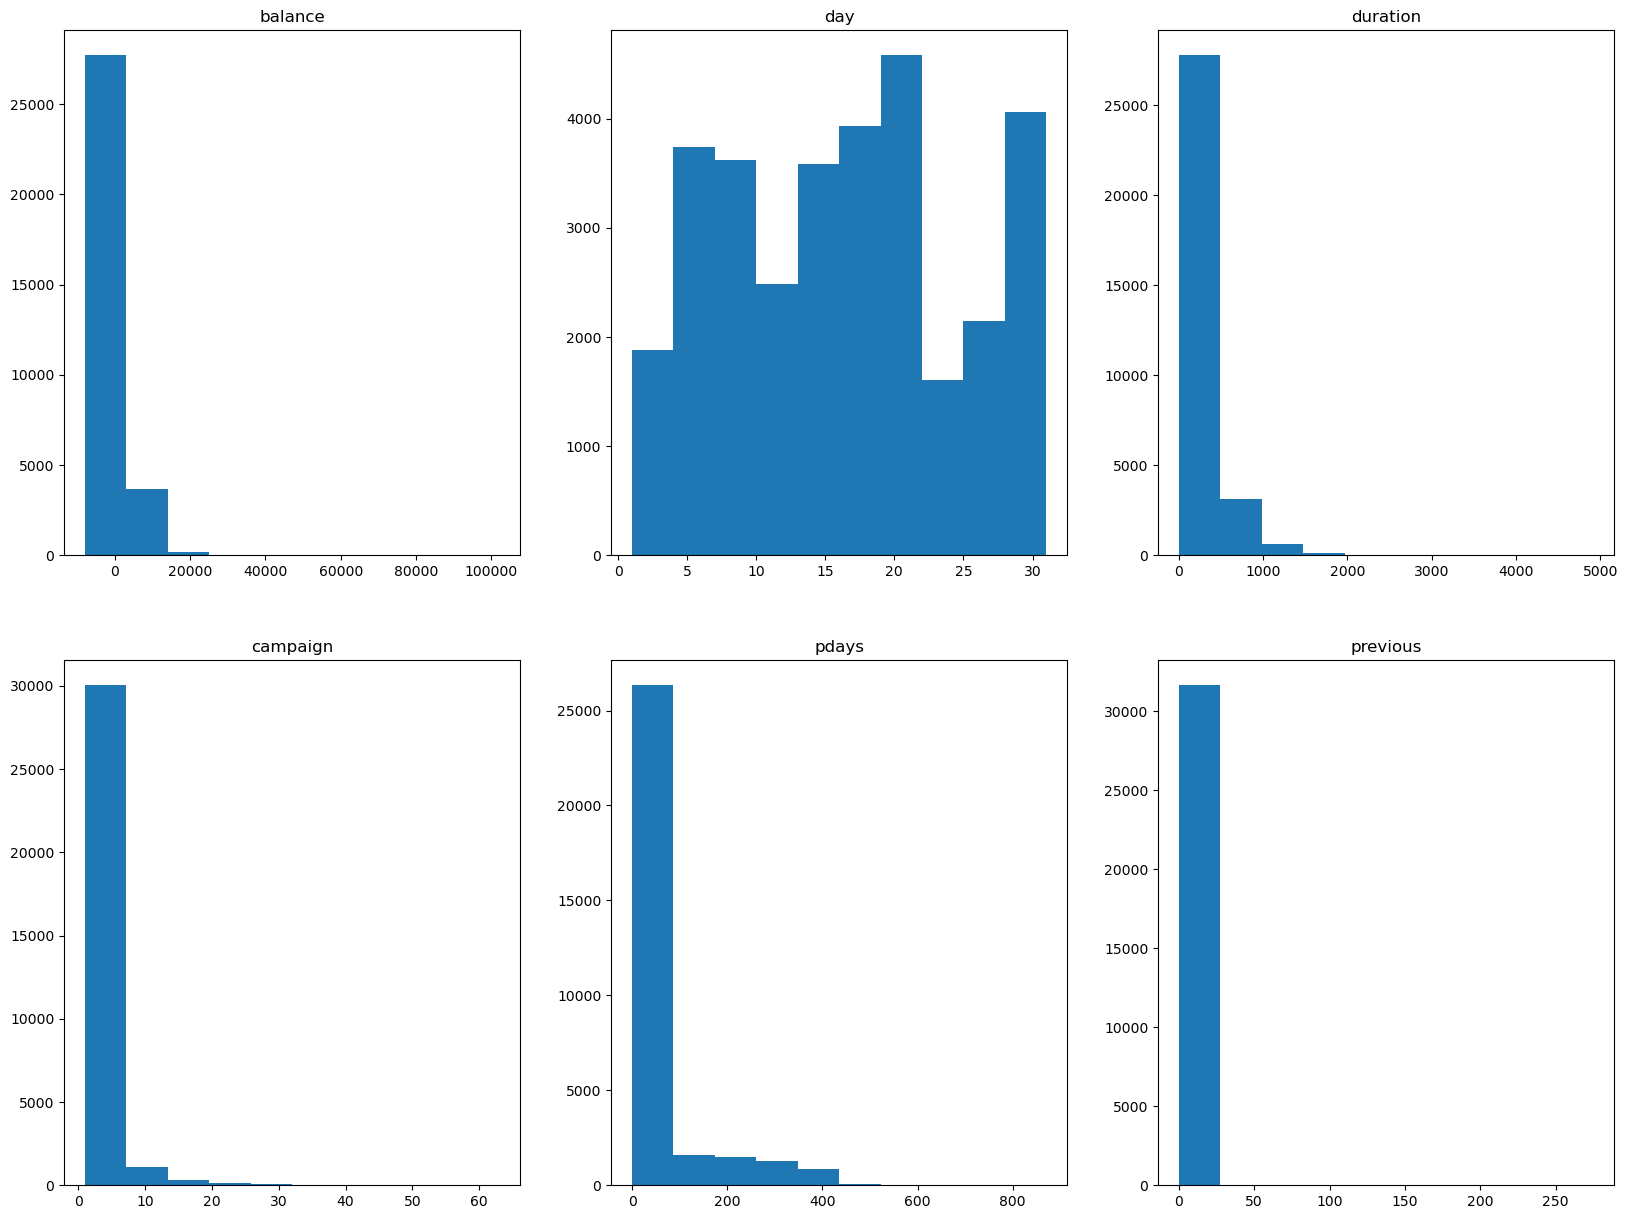

In [15]:
numerical_col = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in numerical_col:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

<Axes: title={'center': 'Subscribed value counts'}, xlabel='subscribed'>

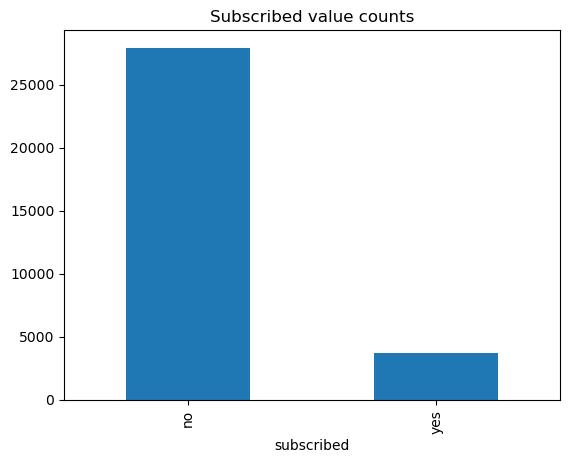

In [16]:
value_counts = df['subscribed'].value_counts()

value_counts.plot.bar(title = 'Subscribed value counts')

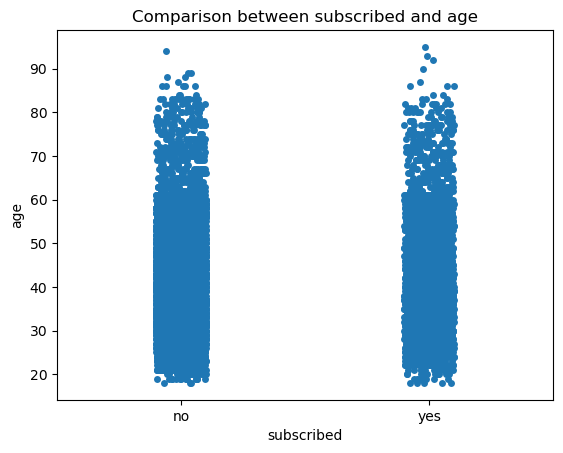

In [17]:
plt.title("Comparison between subscribed and age")
sns.stripplot(x = 'subscribed', y = 'age',data = df)
plt.show()

In [18]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


<Axes: title={'center': 'Job and subscribed'}, xlabel='job'>

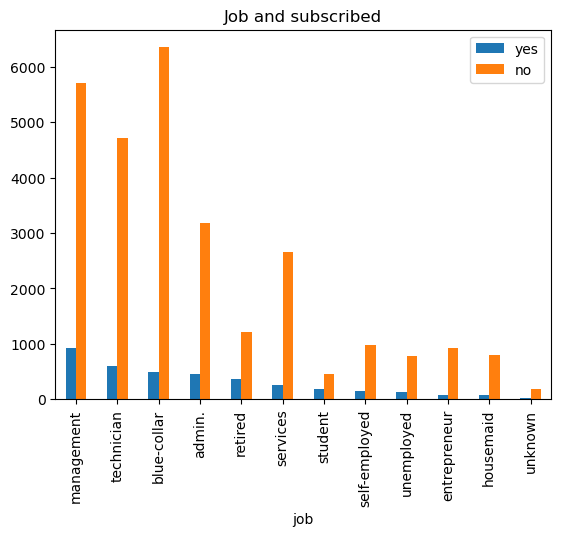

In [19]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['subscribed'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['subscribed'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and subscribed')

<Axes: title={'center': 'Marital status and subscribed'}, xlabel='marital'>

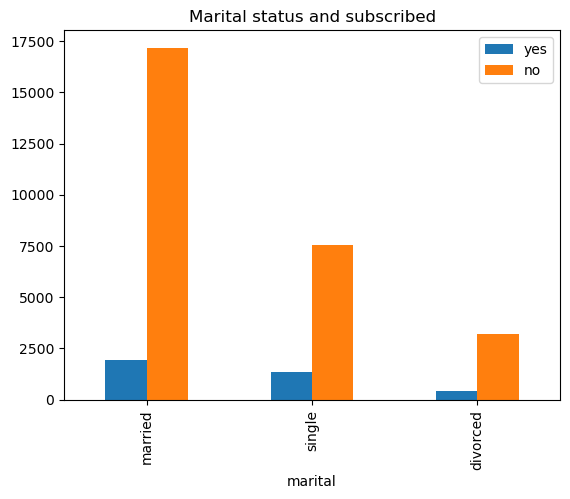

In [20]:
#marital status and subscribed
j_df = pd.DataFrame()

j_df['yes'] = df[df['subscribed'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['subscribed'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and subscribed')

In [21]:
b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['subscribed'] == 'yes'][['subscribed','balance']].describe())['balance']
b_df['balance_no'] = (df[df['subscribed'] == 'no'][['subscribed','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,3715.000000,27932.000000
mean,1785.768237,1307.779822
std,3423.602275,2967.322474
min,-3058.000000,-8019.000000
25%,216.000000,59.000000
50%,746.000000,418.000000
75%,2157.500000,1350.250000
max,81204.000000,102127.000000


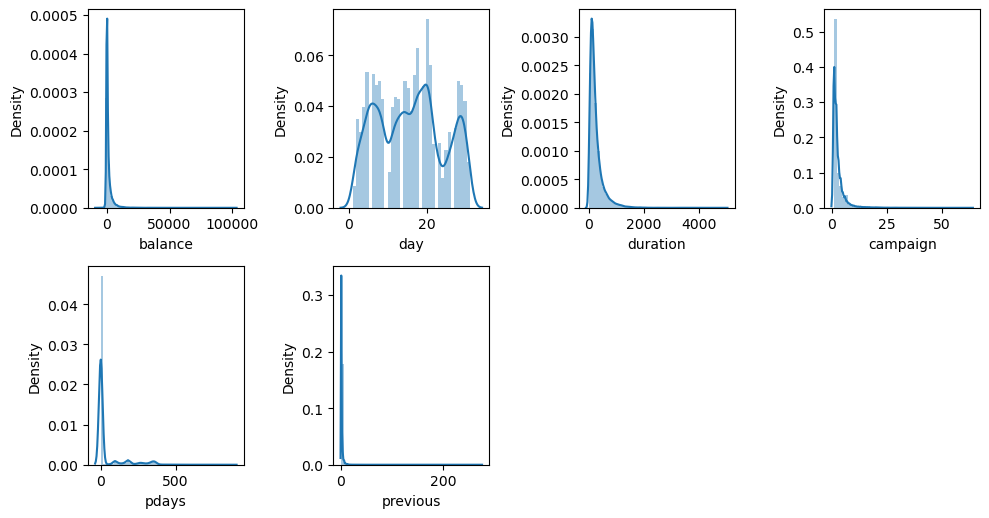

In [25]:
plt.figure(figsize=(10,10), facecolor= "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()
        

In [27]:
#converion of some columns into numeric
df['subscribed'] = df['subscribed'].map({'yes':1, 'no':0})

In [28]:
df['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [29]:
df['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [31]:
df['poutcome']  = df['poutcome'].map({'success':1, 'failure': 0, 'unknown':3, 'other':4})

In [32]:
df['poutcome']

0        3
1        3
2        3
3        1
4        3
        ..
31642    3
31643    3
31644    3
31645    0
31646    3
Name: poutcome, Length: 31647, dtype: int64

In [33]:
df['default'] = df['default'].map({'yes':1,'no':0})

In [34]:
df['default']

0        0
1        0
2        0
3        0
4        0
        ..
31642    0
31643    0
31644    0
31645    0
31646    0
Name: default, Length: 31647, dtype: int64

In [35]:
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['housing']

0        0
1        0
2        1
3        0
4        1
        ..
31642    1
31643    0
31644    0
31645    1
31646    1
Name: housing, Length: 31647, dtype: int64

In [36]:
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['loan']

0        0
1        0
2        0
3        0
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    0
Name: loan, Length: 31647, dtype: int64

In [37]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,0.018485,1363.890258,0.555629,0.162132,15.835466,258.113534,2.765697,39.576042,0.574272,2.654501,0.117389
std,10.625134,0.134700,3028.304293,0.496904,0.368578,8.337097,257.118973,3.113830,99.317592,2.422529,1.006211,0.321888
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,73.000000,0.000000,0.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,0.000000,450.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,0.000000,1431.000000,1.000000,0.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,4.000000,1.000000


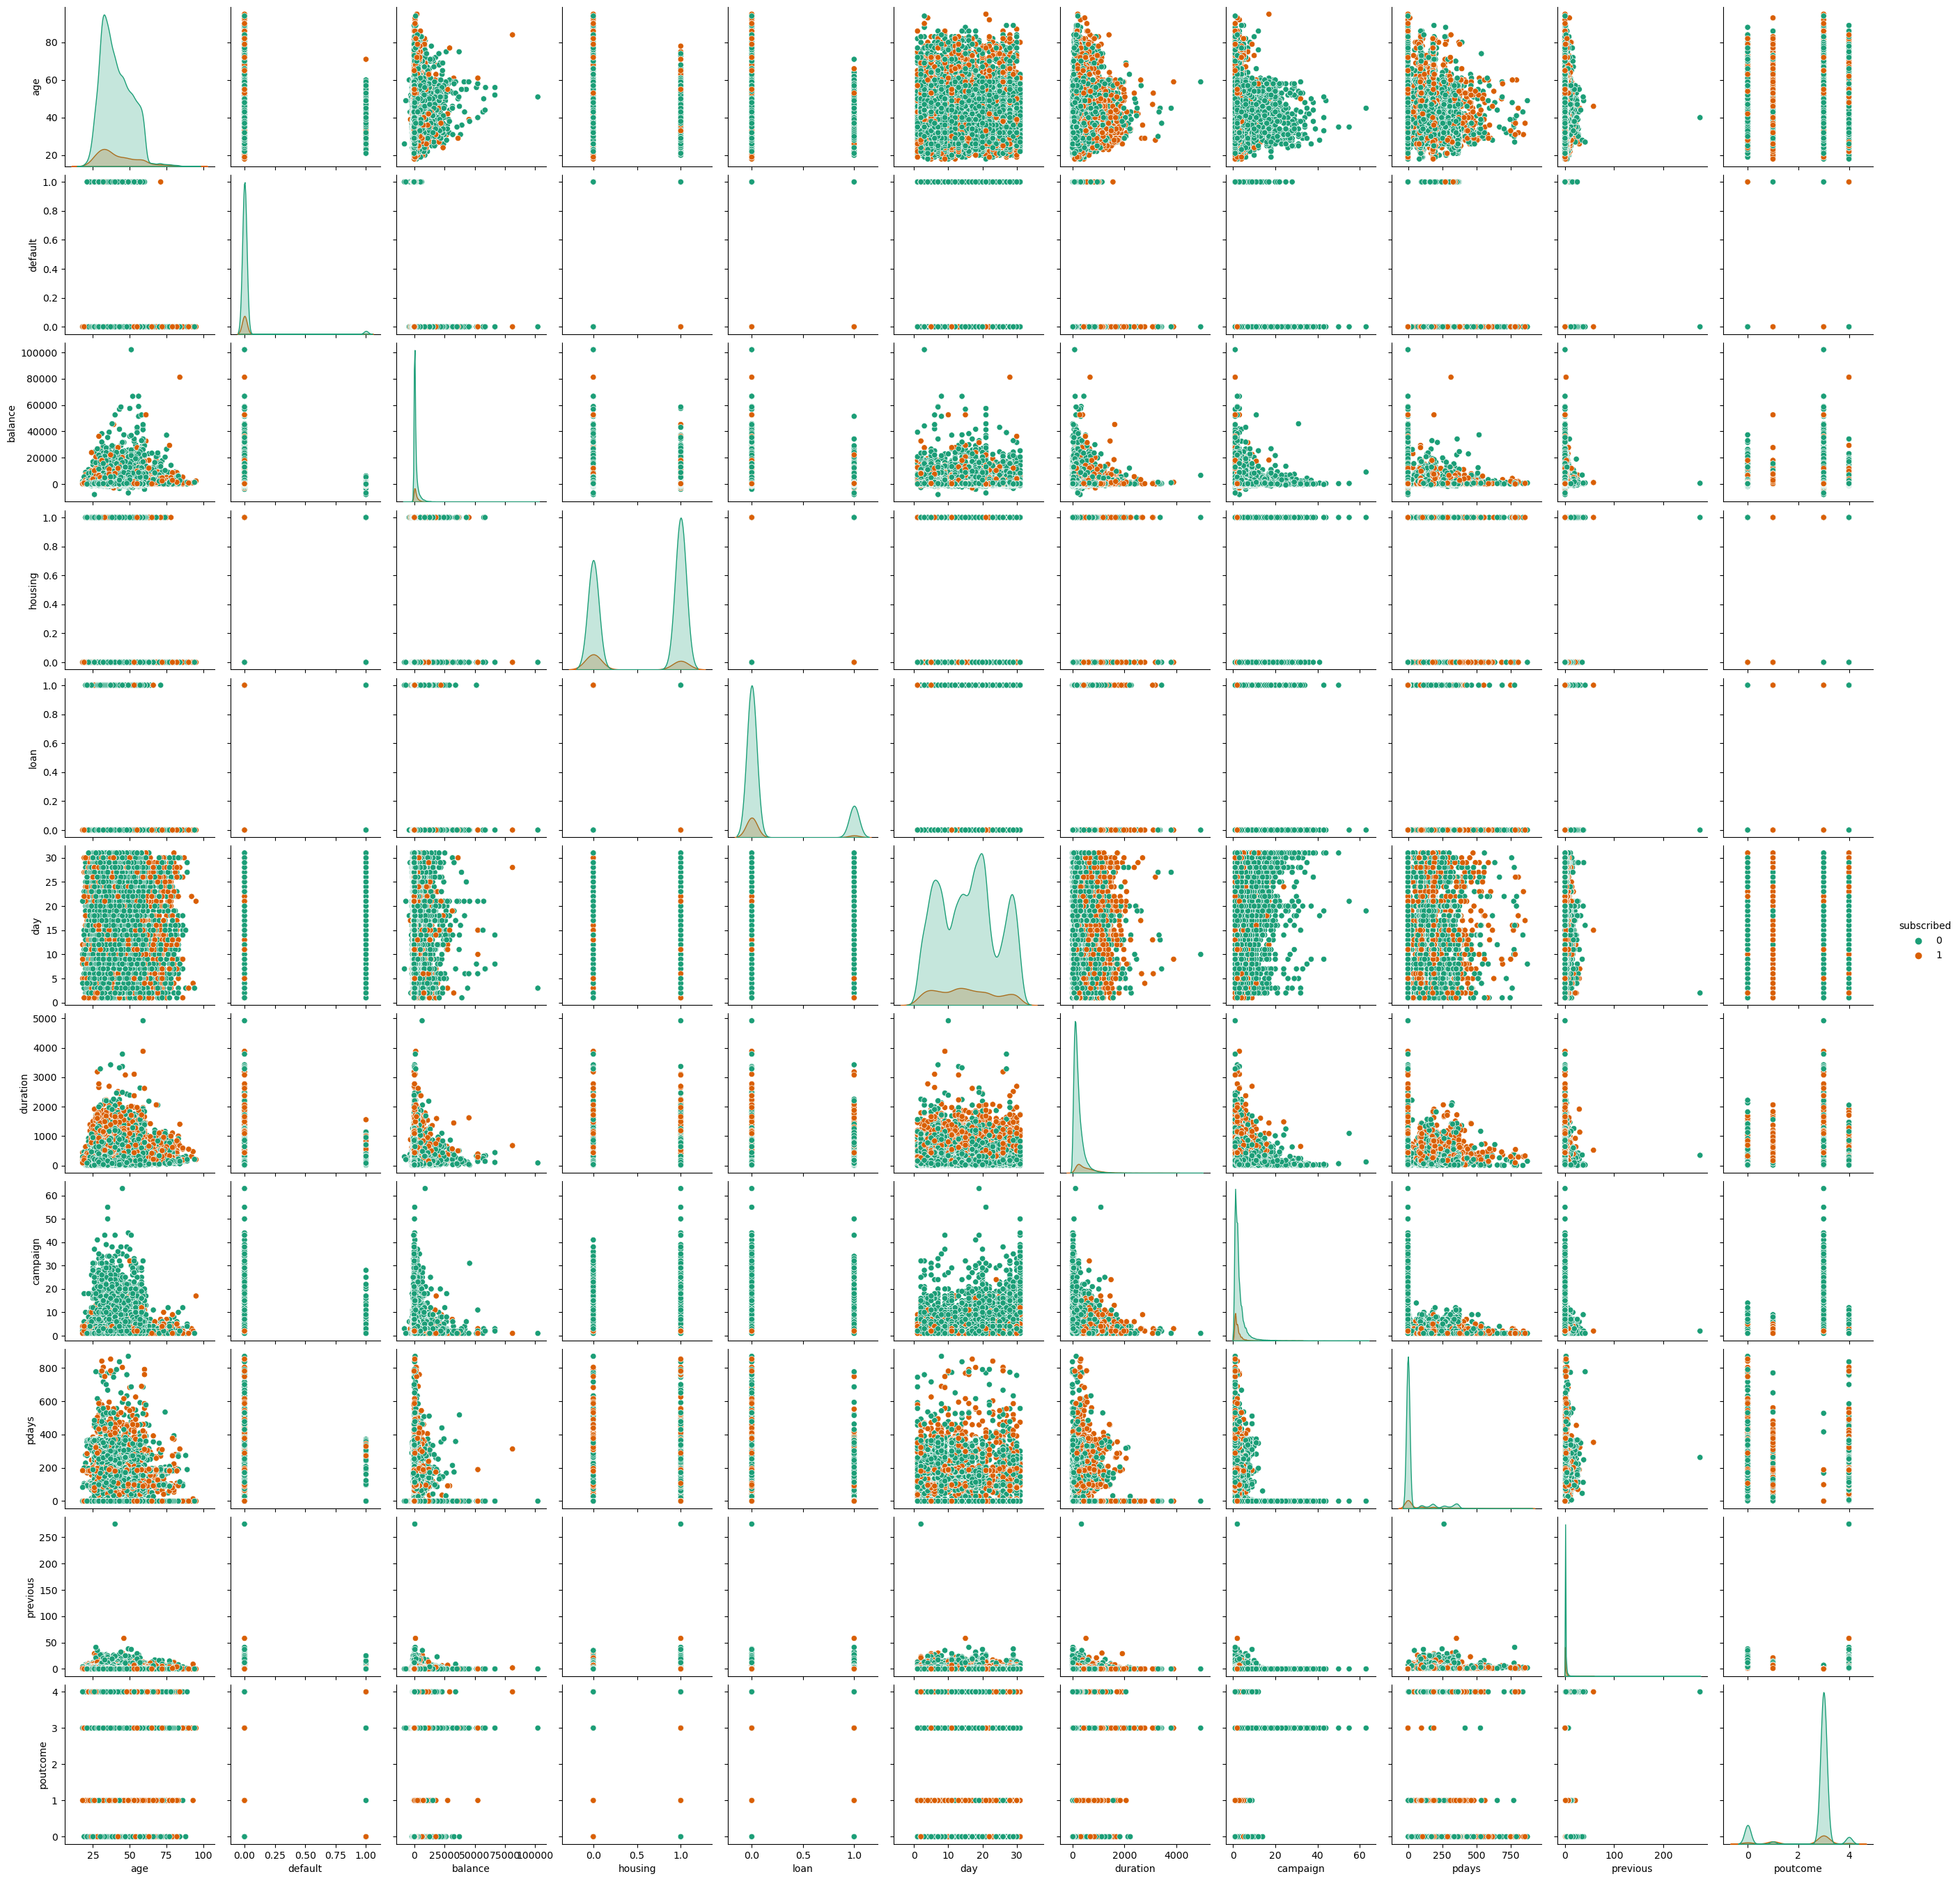

In [44]:
sns.pairplot(data =df, hue='subscribed', palette="Dark2")
plt.show()

In [43]:
df[numerical_col].skew()

age            0.681607
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
day            0.087185
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.970239
subscribed     2.377445
dtype: float64

In [45]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0,1933,0,0,1.0,19,9.0,44,2,-1,0,3,0
1,31,11.0,1.0,1.0,0,3,0,0,0.0,20,5.0,91,2,-1,0,3,0
2,27,7.0,1.0,1.0,0,891,1,0,0.0,18,5.0,240,1,-1,0,3,0
3,57,4.0,0.0,2.0,0,3287,0,0,0.0,22,6.0,867,1,84,3,1,1
4,31,9.0,1.0,1.0,0,119,1,0,0.0,4,3.0,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0,0,1,0,0.0,12,8.0,116,2,-1,0,3,0
31643,53,4.0,0.0,2.0,0,380,0,1,0.0,5,6.0,438,2,-1,0,3,1
31644,32,4.0,2.0,2.0,0,312,0,0,0.0,7,1.0,37,3,-1,0,3,0
31645,57,9.0,1.0,1.0,0,225,1,0,1.0,15,8.0,22,7,337,12,0,0


In [46]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.970239
subscribed     2.377445
dtype: float64

In [47]:
cor = df.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,-0.008286,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,-0.000603,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.014824,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.026563,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.031735,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.018903,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.053515,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.014805,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.215403,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.064684,-0.029600


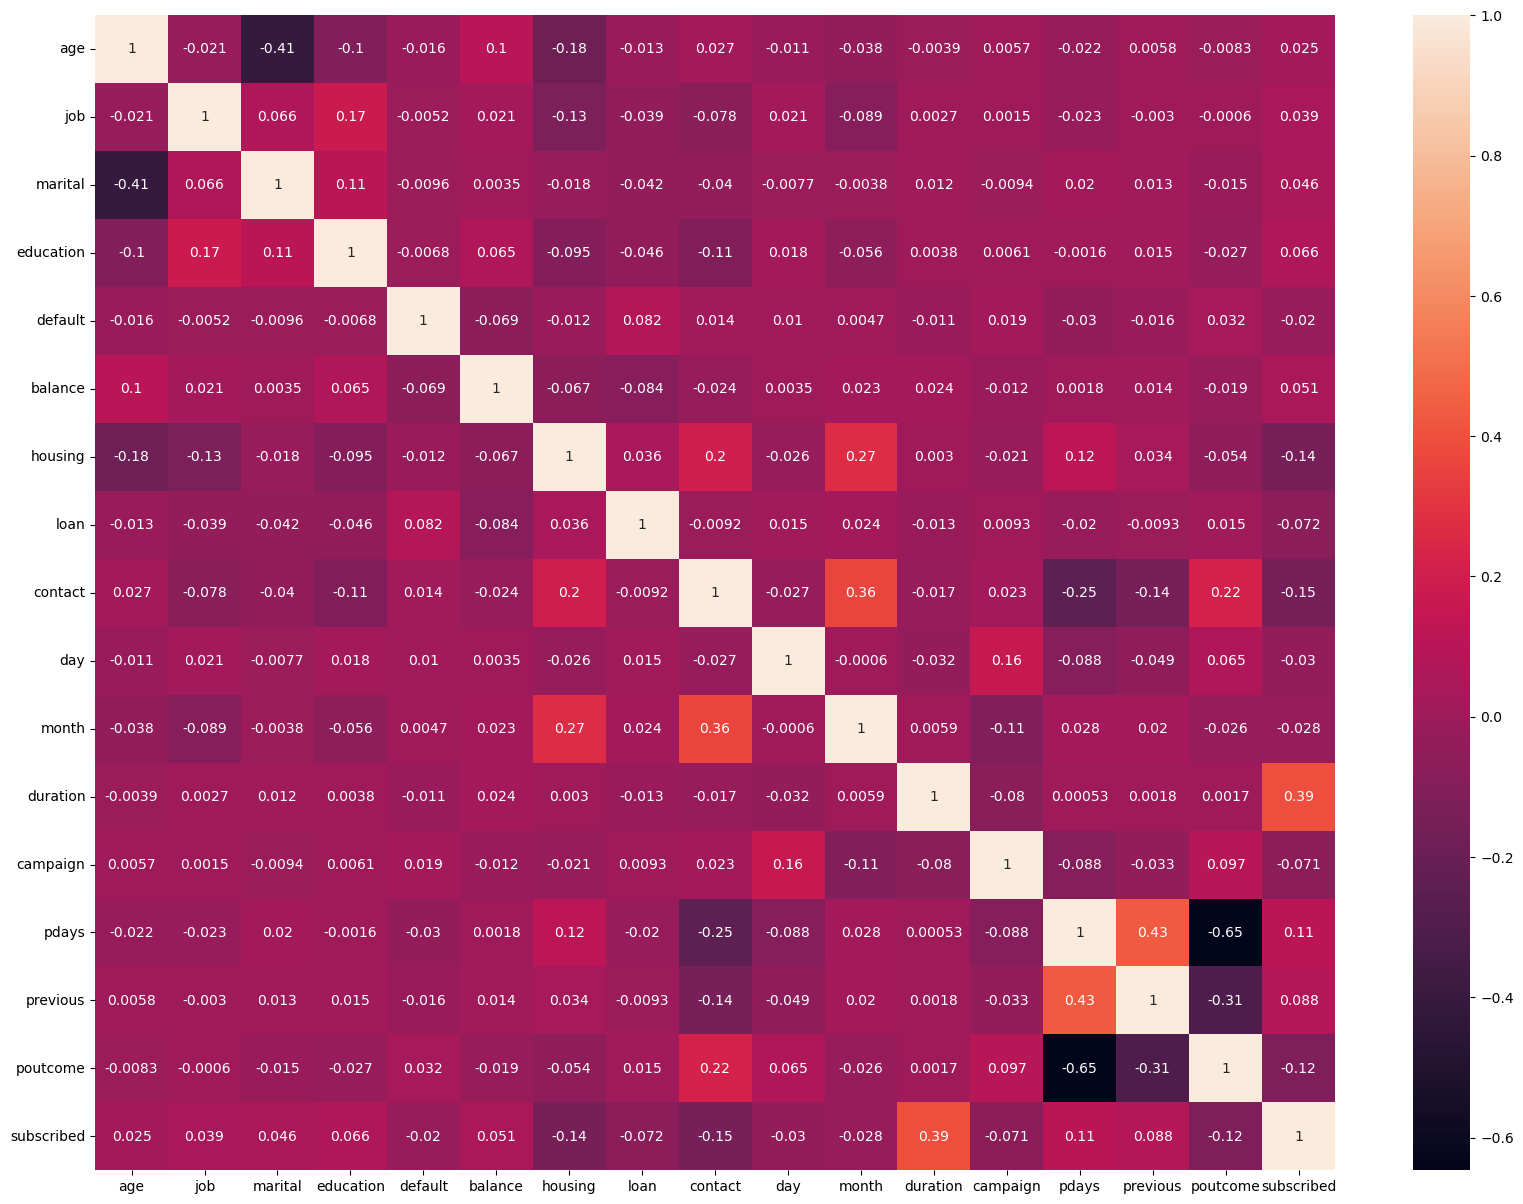

In [48]:
plt.figure(figsize= (20,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [49]:
X = df.drop(['subscribed'], axis =1)
Y = df['subscribed']

In [50]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0.0,1.0,3.0,0,1933,0,0,1.0,19,9.0,44,2,-1,0,3
1,31,11.0,1.0,1.0,0,3,0,0,0.0,20,5.0,91,2,-1,0,3
2,27,7.0,1.0,1.0,0,891,1,0,0.0,18,5.0,240,1,-1,0,3
3,57,4.0,0.0,2.0,0,3287,0,0,0.0,22,6.0,867,1,84,3,1
4,31,9.0,1.0,1.0,0,119,1,0,0.0,4,3.0,380,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0,0,1,0,0.0,12,8.0,116,2,-1,0,3
31643,53,4.0,0.0,2.0,0,380,0,1,0.0,5,6.0,438,2,-1,0,3
31644,32,4.0,2.0,2.0,0,312,0,0,0.0,7,1.0,37,3,-1,0,3
31645,57,9.0,1.0,1.0,0,225,1,0,1.0,15,8.0,22,7,337,12,0


In [51]:
Y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8907846234860453


In [55]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[8240  161]
 [ 876  218]]


In [56]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)


In [57]:
from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

Acc= 0.8845708267509216


In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[8387   14]
 [1082   12]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8401
           1       0.46      0.01      0.02      1094

    accuracy                           0.88      9495
   macro avg       0.67      0.50      0.48      9495
weighted avg       0.84      0.88      0.83      9495



In [59]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.875724065297525
